Script 1: Load and Inspect the Sales Data.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')  # latin1 fixes encoding issues

# Show the first 5 rows
print("Preview of the dataset:")
print(df.head())

# Check the shape
print("\nNumber of rows and columns:", df.shape)

# Show column names and types
print("\nColumn info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Preview of the dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue d

Script 2: Clean and Prepare the Sales Data

In [2]:
# Drop irrelevant or mostly-null columns
df_clean = df.drop(columns=["ADDRESSLINE2", "STATE", "TERRITORY"])

# Convert ORDERDATE to datetime
df_clean["ORDERDATE"] = pd.to_datetime(df_clean["ORDERDATE"])

# Create a new column for monthly analysis
df_clean["YEAR_MONTH"] = df_clean["ORDERDATE"].dt.to_period("M").astype(str)

# Verify changes
print("Cleaned Data Preview:")
print(df_clean[["ORDERDATE", "YEAR_MONTH"]].head())

print("\nFinal Columns:", df_clean.columns.tolist())


Cleaned Data Preview:
   ORDERDATE YEAR_MONTH
0 2003-02-24    2003-02
1 2003-05-07    2003-05
2 2003-07-01    2003-07
3 2003-08-25    2003-08
4 2003-10-10    2003-10

Final Columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'YEAR_MONTH']


 Script 3: Monthly Sales Trend

In [12]:
import matplotlib.pyplot as plt

plt.clf()   # Clear current figure
plt.cla()   # Clear current axes
plt.close() # Close any open figure windows


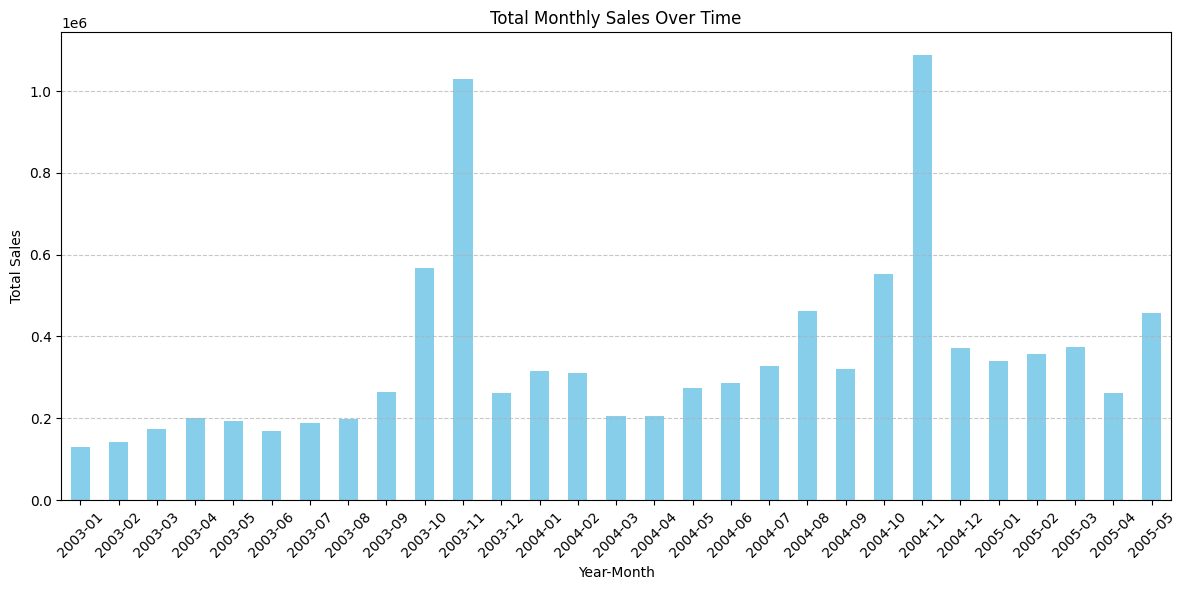

In [13]:
import matplotlib.pyplot as plt

# Group by YEAR_MONTH and sum the sales
monthly_sales = df_clean.groupby("YEAR_MONTH")["SALES"].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="bar", color="skyblue")
plt.title("Total Monthly Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Storytelling:

November is the best selling month in both 2003 and 2004.
October consistently ranks as the second highest sales month each year.
Sales in 2004 exceeded those of 2003, indicating improved performance.

 Script 4: Top-Selling Product Lines (Horizontal Bar Chart)

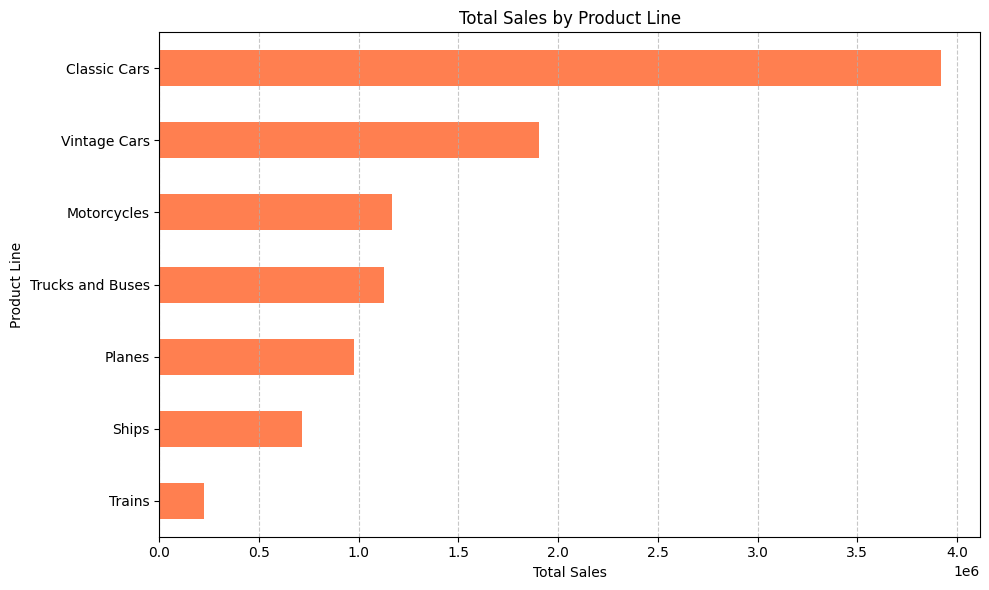

In [14]:
# Aggregate total sales by product line
product_sales = df_clean.groupby("PRODUCTLINE")["SALES"].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
product_sales.plot(kind="barh", color="coral")
plt.title("Total Sales by Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Storytelling:

Among all the product lines, Classic Cars dominate the total sales. 
Vintage cars acts as another major contributor. 
Motorcycles, Trucks and Buses might show a good potential with a little marketing push.

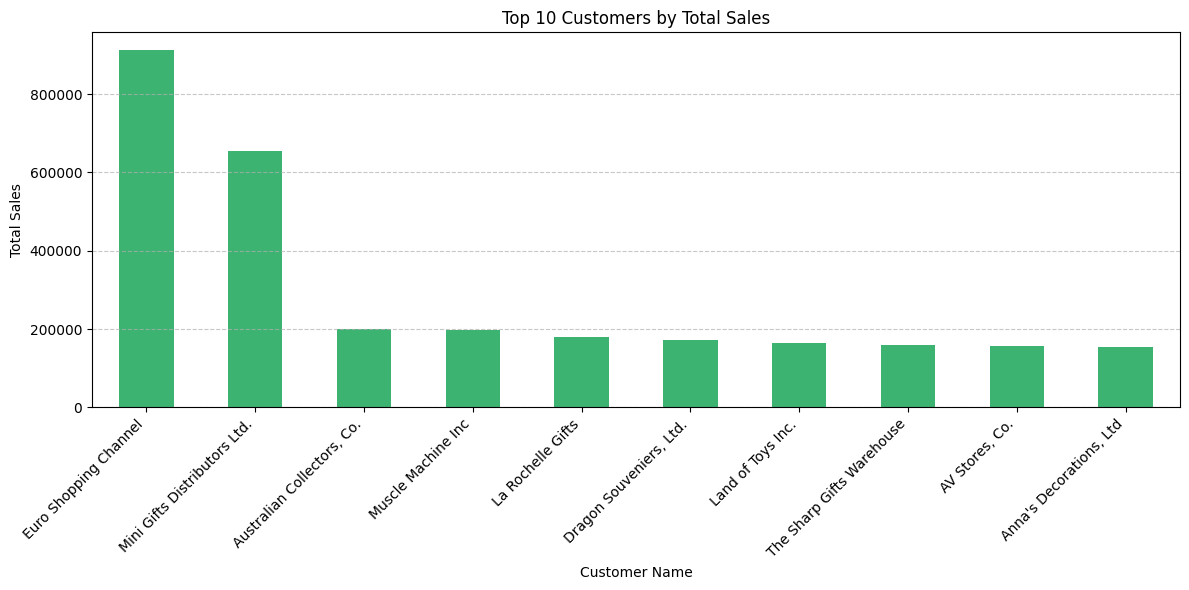

In [15]:
# Aggregate total sales by customer
customer_sales = df_clean.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
customer_sales.plot(kind="bar", color="mediumseagreen")
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





Storytelling:

The top-2 revenue-generating customers are Euro Shopping Channel adn Mini Gifts Distributors Ltd.
Without the top-2 contributors, the total sales among customers ranked 3rd to 10th show minimal variation.

Script 6: Yearly Sales Summary

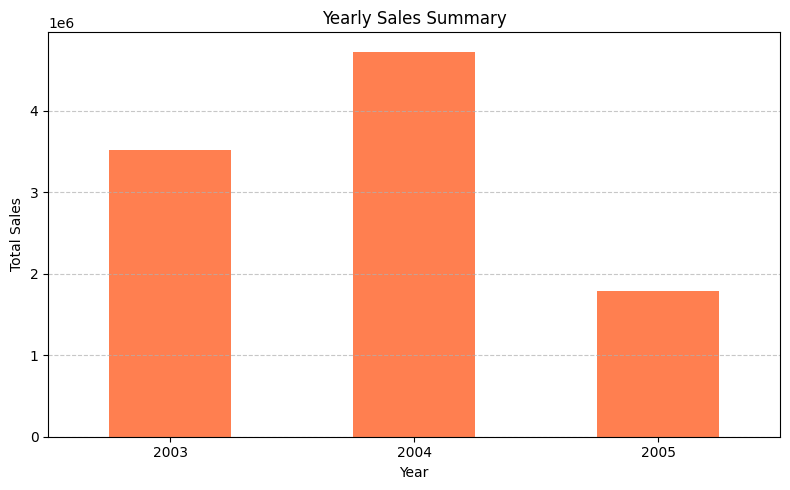

In [16]:
# Group total sales by year
yearly_sales = df_clean.groupby("YEAR_ID")["SALES"].sum()

# Plotting
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind="bar", color="coral")
plt.title("Yearly Sales Summary")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Script 7: Sales by Country

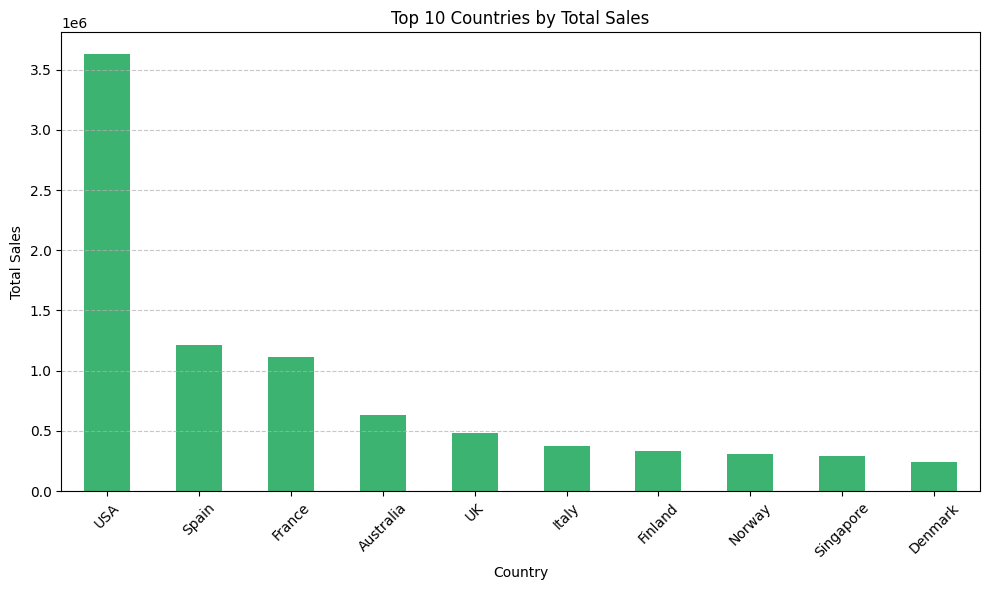

In [17]:
# Grouping total sales by country
country_sales = df_clean.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)

# Plotting top 10 countries by sales
plt.figure(figsize=(10, 6))
country_sales.head(10).plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Montly Sales Trend

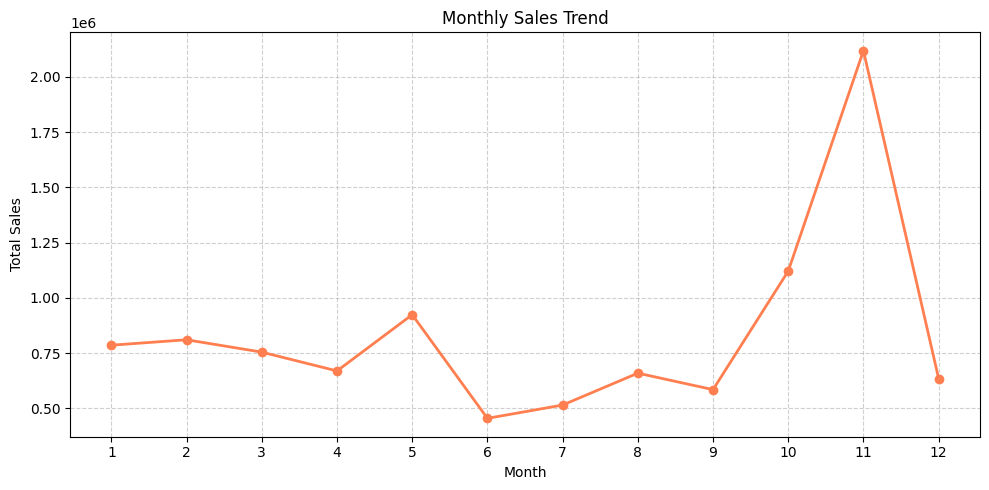

In [18]:
# Group total sales by month
monthly_sales = df_clean.groupby("MONTH_ID")["SALES"].sum().sort_index()

# Plotting monthly sales trend
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='coral', linewidth=2)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))  # months from 1 to 12
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Storytelling:

Reveals seasonal patterns.

A rapid increase in sales from September to November. Seller needs to prepare with enough raw materials and manpower to deliver to meet up the demand.

Helps in forecasting and planning campaigns.

Take fruitful actions by identifying off-season months for improvement.

1. Sales Distribution by Deal Size
Shows what portion of total sales comes from small, medium, and large deals.

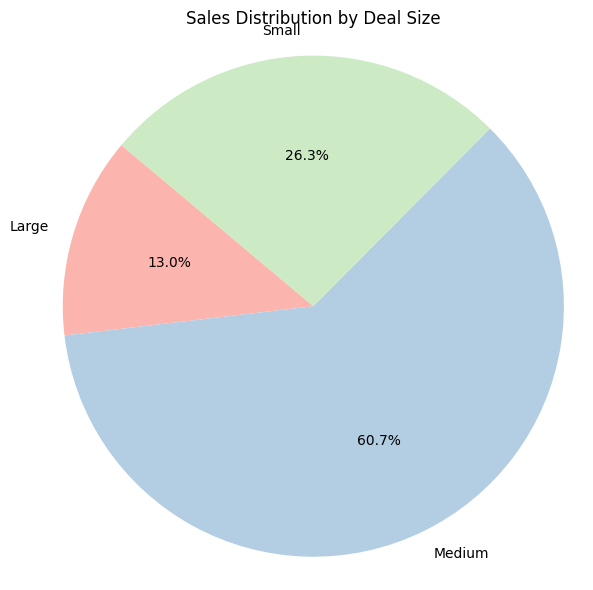

In [19]:
# Group sales by Deal Size
deal_sales = df_clean.groupby("DEALSIZE")["SALES"].sum()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(deal_sales, labels=deal_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Sales Distribution by Deal Size")
plt.axis("equal")  # Makes the pie circular
plt.tight_layout()
plt.show()


2. Orders by Status

This tells you the proportion of orders that are shipped, in process, cancelled, etc.

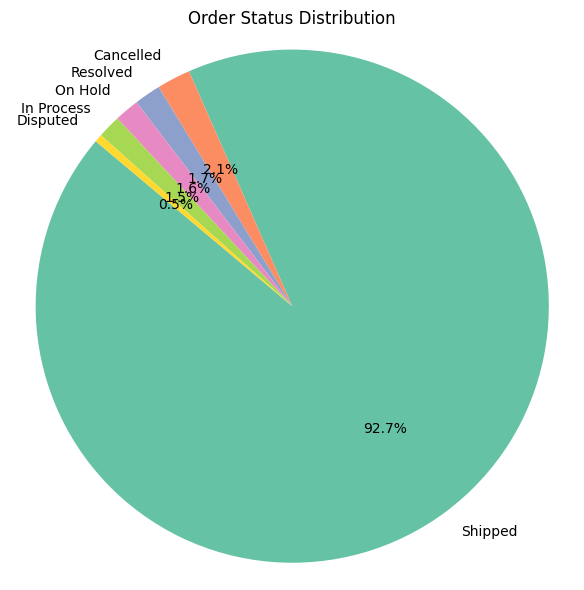

In [20]:
# Count orders by status
status_counts = df_clean["STATUS"].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title("Order Status Distribution")
plt.axis("equal")
plt.tight_layout()
plt.show()
